<a href="https://colab.research.google.com/github/tgfarisha/term-deposit-prediction/blob/main/WineRedQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# install fuzzy package
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
dataset = pd.read_csv('winequality-red.csv', sep=',')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#delete unwanted attribute
del dataset['volatile acidity']
del dataset['citric acid']
del dataset['chlorides']
del dataset['free sulfur dioxide']
del dataset['total sulfur dioxide']
del dataset['density']
del dataset['sulphates']

print(dataset.columns.tolist())

['fixed acidity', 'residual sugar', 'pH', 'alcohol', 'quality']


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from numpy import genfromtxt

In [ ]:
#Antecedent 
fixed = ctrl.Antecedent(np.arange(dataset['fixed acidity'].min(), dataset['fixed acidity'].max(), 1), 'fixed acidity')
sugar = ctrl.Antecedent(np.arange(dataset['residual sugar'].min(), dataset['residual sugar'].max(), 1), 'residual sugar')
ph = ctrl.Antecedent(np.arange(dataset['pH'].min(), dataset['pH'].max(), 1), 'pH')
alcohol = ctrl.Antecedent(np.arange(dataset['alcohol'].min(), dataset['alcohol'].max(), 1), 'alcohol')
quality = ctrl.Consequent(np.arange(dataset['quality'].min(), dataset['quality'].max(), 1), 'quality')

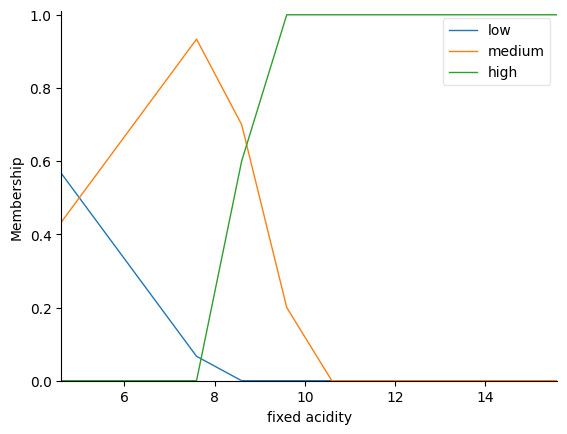

In [ ]:
#create membership function for fixed
fixed['low'] = fuzz.trapmf(fixed.universe, [0, 0, 2, 8])
fixed['medium'] = fuzz.trimf(fixed.universe, [2, 8, 10])
fixed['high'] = fuzz.trapmf(fixed.universe, [8, 9, 16, 16])

#view membership function
fixed.view()

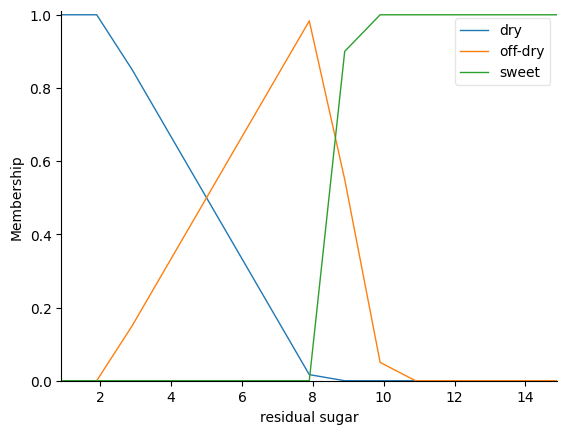

In [ ]:
#create membership function for sugar
sugar['dry'] = fuzz.trapmf(sugar.universe, [0, 0, 2, 8])
sugar['off-dry'] = fuzz.trimf(sugar.universe, [2, 8, 10])
sugar['sweet'] = fuzz.trapmf(sugar.universe, [8, 9, 16, 16])

#view membership function
sugar.view()

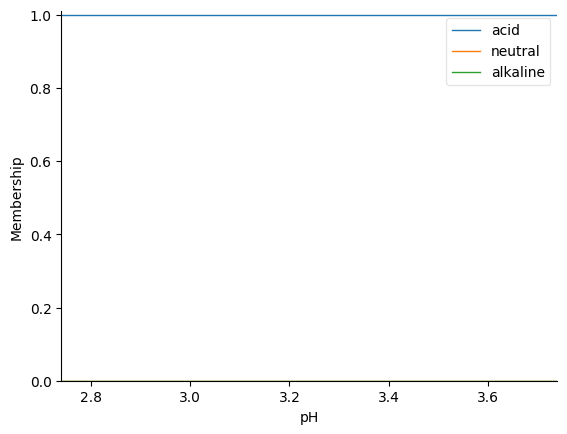

In [ ]:
#create membership function for ph
ph['acid'] = fuzz.trapmf(ph.universe, [0, 0, 5, 6.9])
ph['neutral'] = fuzz.trimf(ph.universe, [7, 7, 7.9])
ph['alkaline'] = fuzz.trapmf(ph.universe, [8, 10, 12, 14])

#view membership function
ph.view()

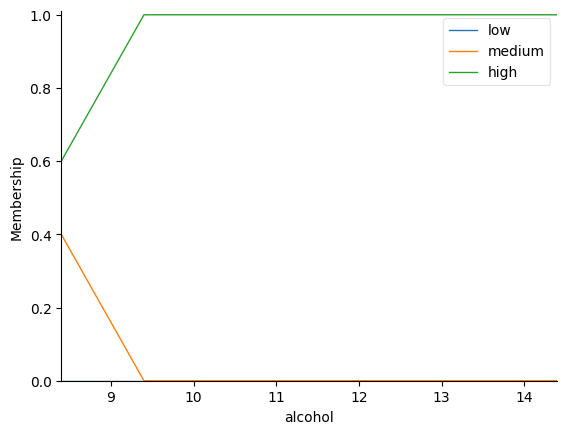

In [ ]:
#create membership function for alcohol
alcohol['low'] = fuzz.trapmf(alcohol.universe, [0, 0, 5, 7.5])
alcohol['medium'] = fuzz.trimf(alcohol.universe, [5, 7.5, 9])
alcohol['high'] = fuzz.trapmf(alcohol.universe, [7.5, 9, 15, 15])

#view membership function
alcohol.view()

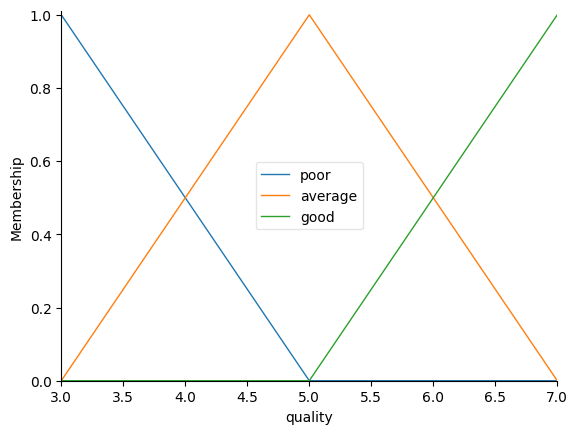

In [ ]:
#create membership function for quality
quality['poor'] = fuzz.trapmf(quality.universe, [0, 0, 3, 5])
quality['average'] = fuzz.trimf(quality.universe, [3, 5, 7])
quality['good'] = fuzz.trapmf(quality.universe, [5, 7, 10, 10])

#view membership function
quality.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

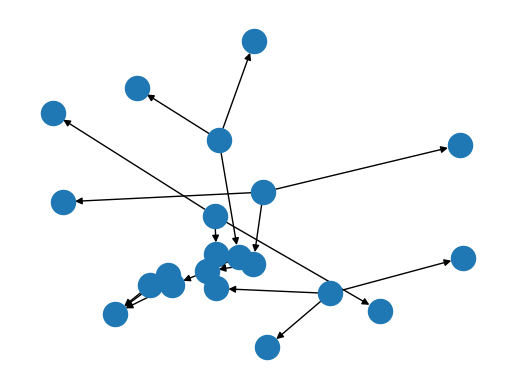

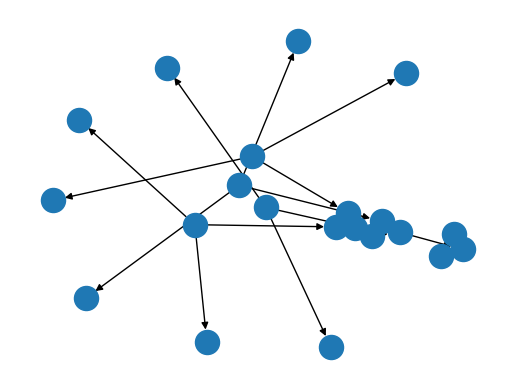

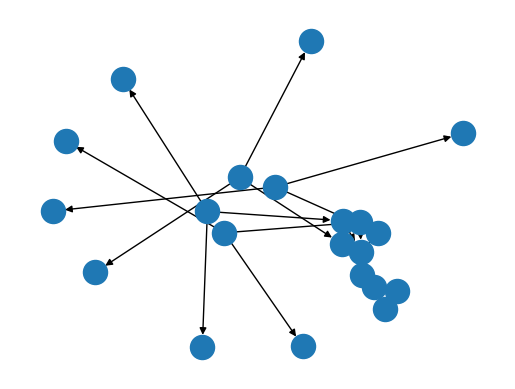

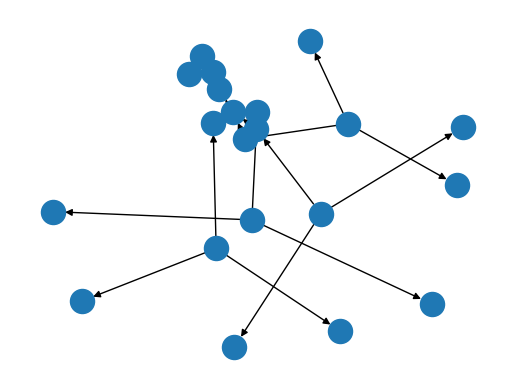

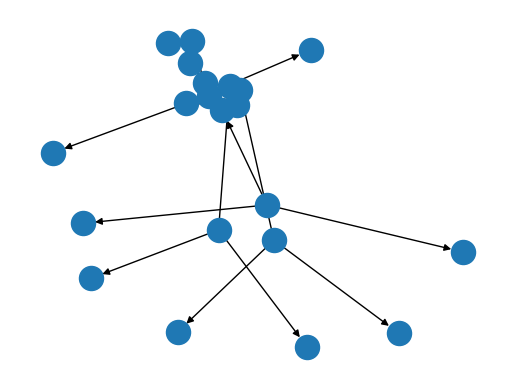

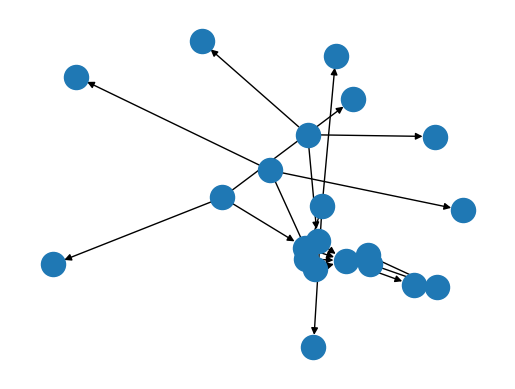

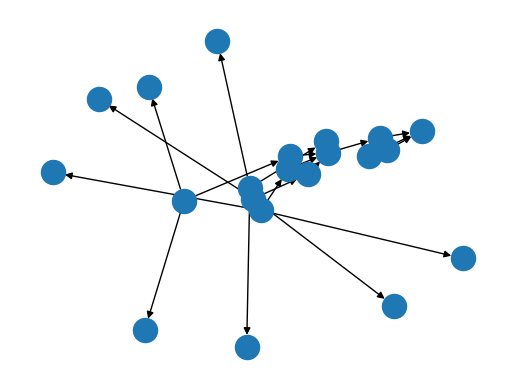

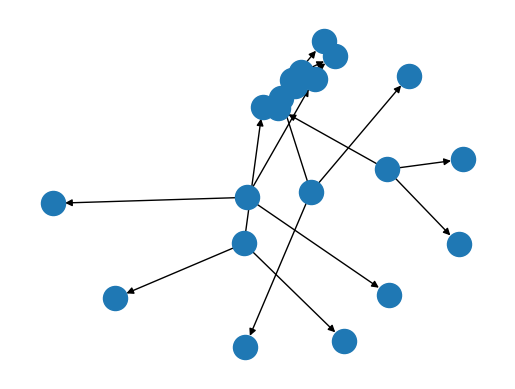

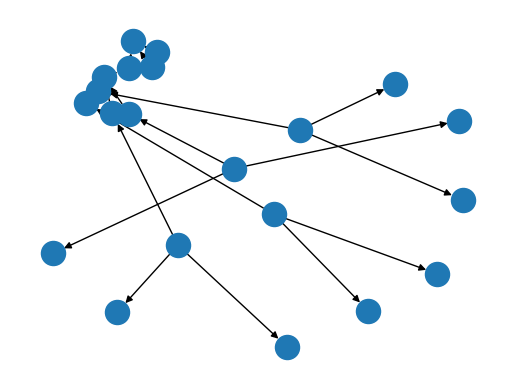

In [ ]:
, #create rules

rule1 = ctrl.Rule(fixed['low'] & sugar['dry'] & ph['alkaline'] & alcohol['medium'], quality['poor'])
rule2 = ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['neutral'] & alcohol['medium'], quality['poor'])
rule3 = ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['acid'] & alcohol['low'], quality['poor'])
rule4 = ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['alkaline'] & alcohol['medium'], quality['poor'])
rule5 = ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['neutral'] & alcohol['medium'], quality['poor'])
rule6 = ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['acid'] & alcohol['medium'], quality['average'])
rule7 = ctrl.Rule(fixed['high'] & sugar['dry'] & ph['alkaline'] & alcohol['medium'], quality['poor'])
rule8 = ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['neutral'] & alcohol['medium'], quality['poor'])
rule9 = ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['acid'] & alcohol['medium'], quality['good'])

quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7,rule8,rule9,
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['alkaline'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['alkaline'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['alkaline'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['neutral'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['neutral'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['neutral'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['acid'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['acid'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['dry'] & ph['acid'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['acid'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['acid'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['off-dry'] & ph['acid'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['acid'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['acid'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['low'] & sugar['sweet'] & ph['acid'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['acid'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['acid'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['dry'] & ph['acid'] & alcohol['high'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['acid'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['acid'] & alcohol['medium'], quality['average']),
    ctrl.Rule(fixed['medium'] & sugar['off-dry'] & ph['acid'] & alcohol['high'], quality['average']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['acid'] & alcohol['low'], quality['average']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['acid'] & alcohol['medium'], quality['average']),
    ctrl.Rule(fixed['medium'] & sugar['sweet'] & ph['acid'] & alcohol['high'], quality['average']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['acid'] & alcohol['low'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['acid'] & alcohol['medium'], quality['poor']),
    ctrl.Rule(fixed['high'] & sugar['dry'] & ph['acid'] & alcohol['high'], quality['average']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['acid'] & alcohol['low'], quality['average']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['acid'] & alcohol['medium'], quality['average']),
    ctrl.Rule(fixed['high'] & sugar['off-dry'] & ph['acid'] & alcohol['high'], quality['average']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['acid'] & alcohol['low'], quality['average']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['acid'] & alcohol['medium'], quality['good']),
    ctrl.Rule(fixed['high'] & sugar['sweet'] & ph['acid'] & alcohol['high'], quality['good']),
    ])

quality_predict = ctrl.ControlSystemSimulation(quality_ctrl)

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

4.941935408948915


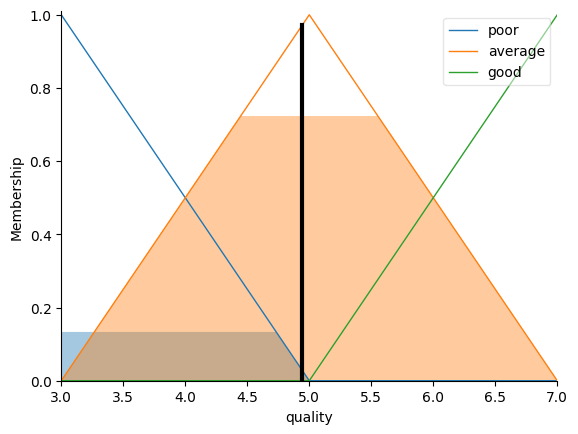

In [ ]:
quality_predict.input['fixed acidity'] = 8.5
quality_predict.input['residual sugar'] = 7.2
quality_predict.input['pH'] = 3.2
quality_predict.input['alcohol'] = 10

quality_predict.compute()

print(quality_predict.output['quality'])
quality.view(sim=quality_predict)

3.754005167958656


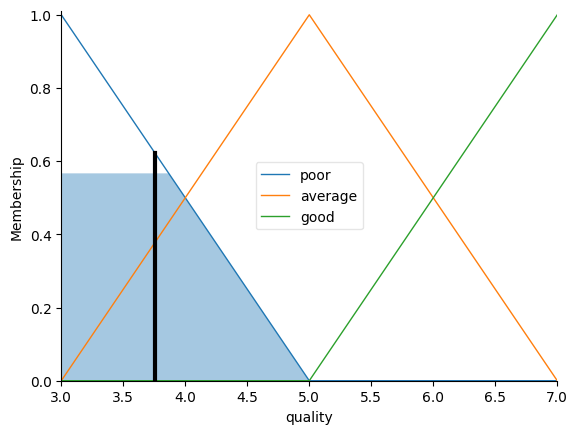

In [ ]:
quality_predict.input['fixed acidity'] = 4.2
quality_predict.input['residual sugar'] = 0.5
quality_predict.input['pH'] = 7.9
quality_predict.input['alcohol'] = 8 

quality_predict.compute()

print(quality_predict.output['quality'])
quality.view(sim=quality_predict)

6.129987242696442


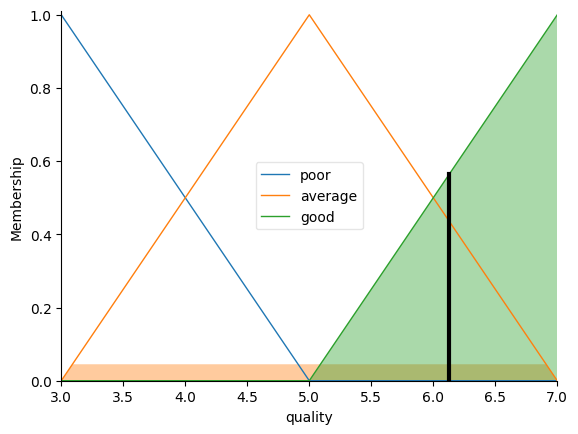

In [ ]:
quality_predict.input['fixed acidity'] = 15.9
quality_predict.input['residual sugar'] = 10
quality_predict.input['pH'] = 3.2
quality_predict.input['alcohol'] = 13 

quality_predict.compute()

print(quality_predict.output['quality'])
quality.view(sim=quality_predict)

4.416666666666667


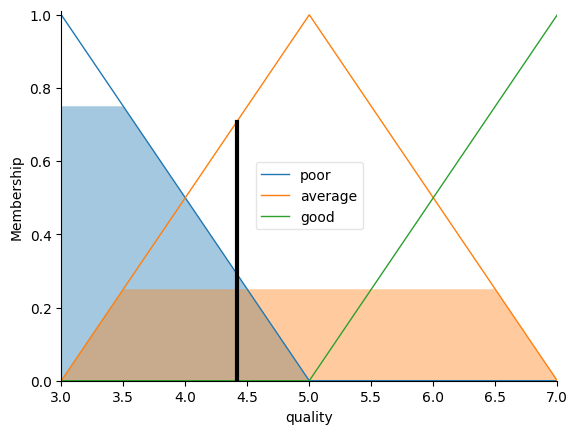

In [ ]:
quality_predict.input['fixed acidity'] = 7
quality_predict.input['residual sugar'] = 3.5
quality_predict.input['pH'] = 7
quality_predict.input['alcohol'] = 12 

quality_predict.compute()

print(quality_predict.output['quality'])
quality.view(sim=quality_predict)

5.000000000000001


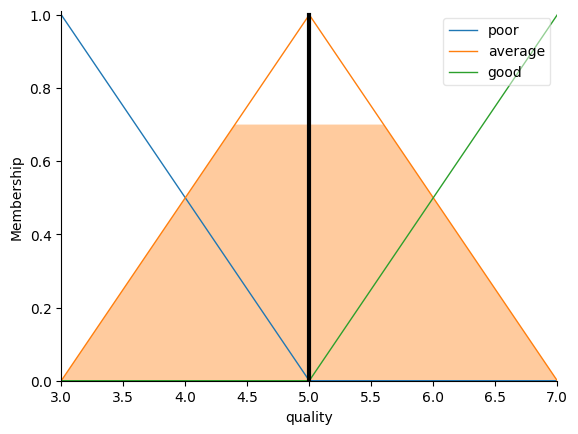

In [ ]:
quality_predict.input['fixed acidity'] = 12
quality_predict.input['residual sugar'] = 6.2
quality_predict.input['pH'] = 2.2
quality_predict.input['alcohol'] = 12.9 

quality_predict.compute()

print(quality_predict.output['quality'])
quality.view(sim=quality_predict)

In [ ]:
result = []
predicted = []
compare = []
tr = 0

tp = 0
fn = 0
fp = 0
tn = 0

dataset.reset_index()

count = 0
for index, row in dataset.iterrows():
    print(count, row['fixed acidity'], row['residual sugar'], row['pH'], row['alcohol'], row['quality'])
    count += 1

    quality_predict.input['fixed acidity'] = row['fixed acidity']
    quality_predict.input['residual sugar'] = row['residual sugar']
    quality_predict.input['pH'] = row['pH']
    quality_predict.input['alcohol'] = row['alcohol']

    quality_predict.compute()

    p = round(quality_predict.output['quality'], 0)

    result.append(quality_predict.output['quality'])

    match = p == row['quality']

    if (match) : tr += 1

    tp += int((p == 1.) & (row['quality'] == 1))
    fn += int((p == 0.) & (row['quality'] == 1))
    fp += int((p == 1.) & (row['quality'] == 0))
    tn += int((p == 0.) & (row['quality'] == 0))

    compare.append(int(match))
    predicted.append(round(quality_predict.output['quality'], 0))

print('Total data:', len(dataset))
print('Total true:', tr)
print('Accuracy:', (tr/len(dataset))*100)
print('TP:', tp)
print('FN:', fn)
print('FP:', fp)
print('TN:', tn)
     

0 7.4 1.9 3.51 9.4 5.0
1 7.8 2.6 3.2 9.8 5.0
2 7.8 2.3 3.26 9.8 5.0
3 11.2 1.9 3.16 9.8 6.0
4 7.4 1.9 3.51 9.4 5.0
5 7.4 1.8 3.51 9.4 5.0
6 7.9 1.6 3.3 9.4 5.0
7 7.3 1.2 3.39 10.0 7.0
8 7.8 2.0 3.36 9.5 7.0
9 7.5 6.1 3.35 10.5 5.0
10 6.7 1.8 3.28 9.2 5.0
11 7.5 6.1 3.35 10.5 5.0
12 5.6 1.6 3.58 9.9 5.0
13 7.8 1.6 3.26 9.1 5.0
14 8.9 3.8 3.16 9.2 5.0
15 8.9 3.9 3.17 9.2 5.0
16 8.5 1.8 3.3 10.5 7.0
17 8.1 1.7 3.11 9.3 5.0
18 7.4 4.4 3.38 9.0 4.0
19 7.9 1.8 3.04 9.2 6.0
20 8.9 1.8 3.39 9.4 6.0
21 7.6 2.3 3.52 9.7 5.0
22 7.9 1.6 3.17 9.5 5.0
23 8.5 2.3 3.17 9.4 5.0
24 6.9 2.4 3.43 9.7 6.0
25 6.3 1.4 3.34 9.3 5.0
26 7.6 1.8 3.28 9.5 5.0
27 7.9 1.6 3.17 9.5 5.0
28 7.1 1.9 3.47 9.4 5.0
29 7.8 2.0 3.38 9.8 6.0
30 6.7 2.4 3.35 10.1 5.0
31 6.9 2.5 3.46 10.6 6.0
32 8.3 2.3 3.17 9.8 5.0
33 6.9 10.7 3.45 9.4 6.0
34 5.2 1.8 3.38 9.2 5.0
35 7.8 5.5 3.4 9.6 6.0
36 7.8 2.4 3.42 10.8 6.0
37 8.1 2.1 3.23 9.7 7.0
38 5.7 1.5 3.5 9.8 4.0
39 7.3 5.9 3.33 10.5 5.0
40 7.3 5.9 3.33 10.5 5.0
41 8.8 2.8 3.26 9.3 

In [ ]:
dataset.insert(5, "result", result, True)
dataset.insert(6, "compare", compare, True)
dataset.insert(7, "predicted", predicted, True)

print(dataset)

dataset.to_csv('quality.csv')

      fixed acidity  residual sugar    pH  alcohol  quality    result  \
0               7.4             1.9  3.51      9.4        5  3.672727   
1               7.8             2.6  3.20      9.8        5  4.122956   
2               7.8             2.3  3.26      9.8        5  4.122956   
3              11.2             1.9  3.16      9.8        6  5.000000   
4               7.4             1.9  3.51      9.4        5  3.672727   
...             ...             ...   ...      ...      ...       ...   
1594            6.2             2.0  3.45     10.5        5  3.792029   
1595            5.9             2.2  3.52     11.2        6  3.948955   
1596            6.3             2.3  3.42     11.0        6  3.982296   
1597            5.9             2.0  3.57     10.2        5  3.808598   
1598            6.0             3.6  3.39     11.0        6  4.476913   

      compare  predicted  
0           0        4.0  
1           0        4.0  
2           0        4.0  
3           0  